# Work Sample Task: People Analytics - Employee Engagement and Retention Analysis

## Data Dictionary
Age: The age of the employee. (Numerical)

Attrition: Whether or not the employee has left the organization. (Categorical)

BusinessTravel: The frequency of business travel for the employee. (Categorical)

DailyRate: The daily rate of pay for the employee. (Numerical)

Department: The department the employee works in. (Categorical)

DistanceFromHome: The distance from home in miles for the employee. (Numerical)

Education: The level of education achieved by the employee. (Categorical)

EducationField: The field of study for the employee's education. (Categorical)

EmployeeCount: The total number of employees in the organization. (Numerical)

EmployeeNumber: A unique identifier for each employee profile. (Numerical)

EnvironmentSatisfaction: The employee's satisfaction with their work environment. (Categorical)

Gender: The gender of the employee. (Categorical)

HourlyRate: The hourly rate of pay for the employee. (Numerical)

JobInvolvement: The level of involvement required for the employee's job. (Categorical)

JobLevel: The job level of the employee. (Categorical)

JobRole: The role of the employee in the organization. (Categorical)

JobSatisfaction: The employee's satisfaction with their job. (Categorical)

MaritalStatus: The marital status of the employee. (Categorical)

MonthlyIncome: The monthly income of the employee. (Numerical)

MonthlyRate: The monthly rate of pay for the employee. (Numerical)

NumCompaniesWorked: The number of companies the employee has worked for. (Numerical)

Over18: Whether or not the employee is over 18. (Categorical)

OverTime: Whether or not the employee works overtime. (Categorical)

PercentSalaryHike: The percentage of salary hike for the employee. (Numerical)

PerformanceRating: The performance rating of the employee. (Categorical)

RelationshipSatisfaction: The employee's satisfaction with their relationships. (Categorical)

StandardHours: The standard hours of work for the employee. (Numerical)

StockOptionLevel: The stock option level of the employee. (Numerical)

TotalWorkingYears: The total number of years the employee has worked. (Numerical)

TrainingTimesLastYear: The number of times the employee was taken for training in the last year. (Numerical)

WorkLifeBalance: The employee's perception of their work-life balance. (Categorical)

YearsAtCompany: The number of years the employee has been with the company. (Numerical)

YearsInCurrentRole: The number of years the employee has been in their current role. (Numerical)

YearsSinceLastPromotion: The number of years since the employee's last promotion. (Numerical)

YearsWithCurrManager: The number of years the employee has been with their current manager. (Numerical)

Year, Quarter, Month, Day (Categorical)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
import random
from scipy.stats import chi2_contingency, ttest_ind

## 1. Load Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Kaitlynnnnn/HR-Analytics/main/HR_Analytics.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 2. Data Cleaning and Preprocessing

In [3]:
# Define the number of rows
n_rows = 1470

# Define the quarters and their corresponding weights
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
weights = [0.4, 0.3, 0.2, 0.1]

# Generate random quarters based on the weights
random_quarters = np.random.choice(quarters, size=n_rows, p=weights)

# Define the months for each quarter
months = {
    'Q1': [1, 2, 3],
    'Q2': [4, 5, 6],
    'Q3': [7, 8, 9],
    'Q4': [10, 11, 12]
}

# Generate random months based on the quarters
random_months = np.array([np.random.choice(months[quarter]) for quarter in random_quarters])

# Generate random days (assuming all months have 30 days for simplicity)
random_days = np.random.randint(1, 31, size=n_rows)

# Generate random years (assuming all dates are in the year 2022)
random_years = np.repeat(2023, n_rows)

# Add the generated date columns to the existing DataFrame
df['Year'] = random_years
df['Quarter'] = random_quarters
df['Month'] = random_months
df['Day'] = random_days

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Year,Quarter,Month,Day
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,1,6,4,0,5,2023,Q1,2,21
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,3,10,7,1,7,2023,Q2,4,22
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,3,0,0,0,0,2023,Q3,8,9
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,8,7,3,0,2023,Q1,1,28
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,3,2,2,2,2,2023,Q2,4,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## 3. Exploratory Data Analysis (EDA)

In [5]:
df.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Year,Quarter,Month,Day
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q1,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,592,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,2023.0,NaN,4.961224,15.864626
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.0,NaN,3.041665,8.713192
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2023.0,NaN,1.000000,1.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2023.0,NaN,2.000000,8.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,2023.0,NaN,4.000000,16.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,2023.0,NaN,7.000000,23.000000


### Q1: Which department have the highest attrition rate?

In [6]:
df['Attrition'] = np.where(df['Attrition'] == 'Yes', 1, 0)
df_dept = df.groupby('Department')['Attrition'].mean().reset_index()
df_dept

,Department,Attrition
0,Human Resources,0.190476
1,Research & Development,0.138398
2,Sales,0.206278


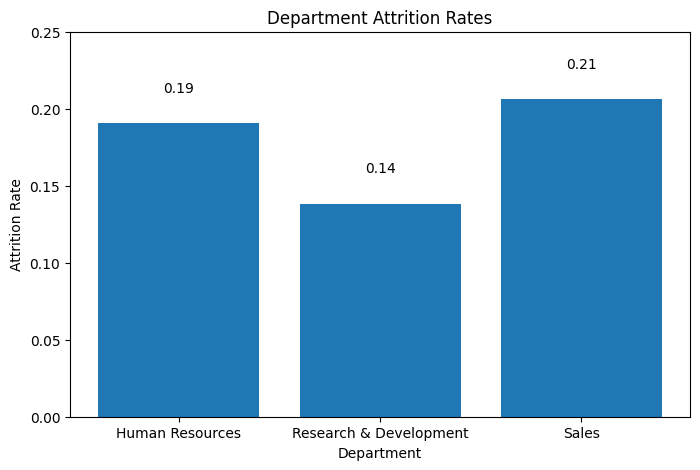

In [7]:
plt.figure(figsize=(8,5))
plt.bar(df_dept['Department'], df_dept['Attrition'])
plt.title('Department Attrition Rates')
plt.xlabel('Department')
plt.ylabel('Attrition Rate')
plt.ylim((0, 0.25))
for i, rate in enumerate(df_dept['Attrition']):
    plt.text(i, rate+0.02, f'{rate:.2f}', ha='center')

plt.show()

The **Sales** department appears to have the highest attrition. To reduce the attrition rate, it is necessary to analyze the causes.

### Q2: Which departments do employees with high salaries usually work in?

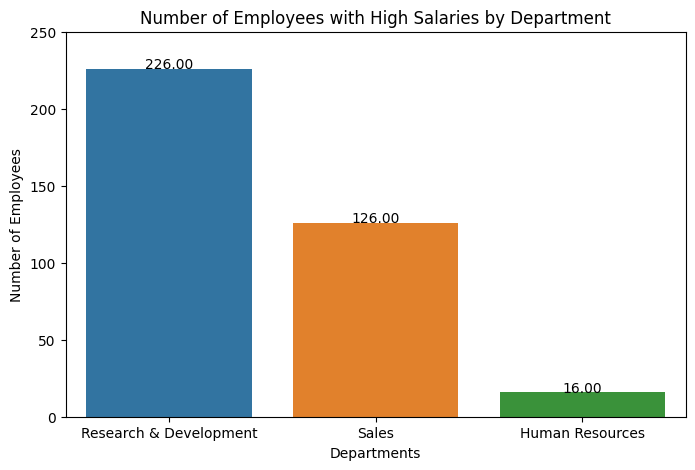

In [8]:
high_income = df[df['MonthlyIncome'] > df['MonthlyIncome'].quantile(0.75)]

department_counts = high_income['Department'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=department_counts.index, y=department_counts.values)
plt.title('Number of Employees with High Salaries by Department')
plt.xlabel('Departments')
plt.ylabel('Number of Employees')
plt.ylim((0, 250))
for i, rate in enumerate(department_counts):
    plt.text(i, rate+0.02, f'{rate:.2f}', ha='center')

plt.show()

From the graph, we find that employees in the Research & Development department gain higher salaries.

### Q3: Which education level do employees with higher salaries have?

In [9]:
education_level = df.groupby('Education')['MonthlyIncome'].mean().reset_index()
education_level

,Education,MonthlyIncome
0,1,5640.570588
1,2,6226.645390
2,3,6517.263986
3,4,6832.402010
4,5,8277.645833


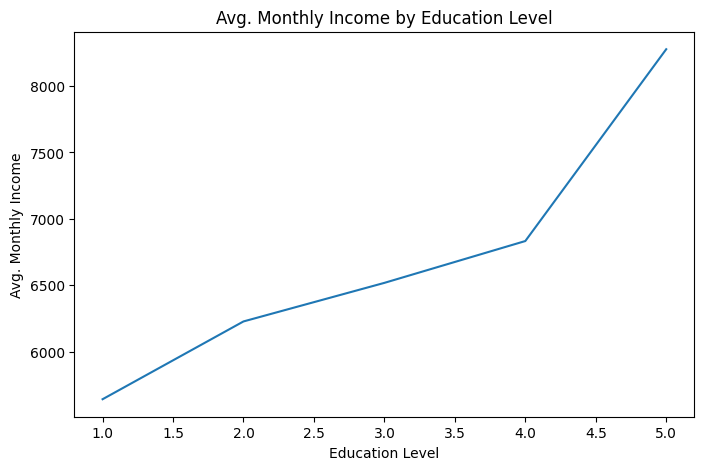

In [10]:
plt.figure(figsize=(8,5))
plt.plot(education_level['Education'], education_level['MonthlyIncome'])
plt.xlabel('Education Level')
plt.ylabel('Avg. Monthly Income')
plt.title('Avg. Monthly Income by Education Level')
plt.show()

From the above line chart, it tells that as the education level increases, the average monthly income increases. Therefore, employees with higher education levels usually receive higher salaries.

### Q4: Is there a relationship between job satisfaction and attrition rates?

In [11]:
satisfy_att = df.groupby(['JobSatisfaction', 'Attrition'])['Attrition'].count().unstack()

# Calculate Attrition Rate for each group
satisfy_att['Attrition Rate'] = satisfy_att[1] / (satisfy_att[1] + satisfy_att[0])
satisfy_att

Attrition,0,1,Attrition Rate
JobSatisfaction,,,
1,223,66,0.228374
2,234,46,0.164286
3,369,73,0.165158
4,407,52,0.113290


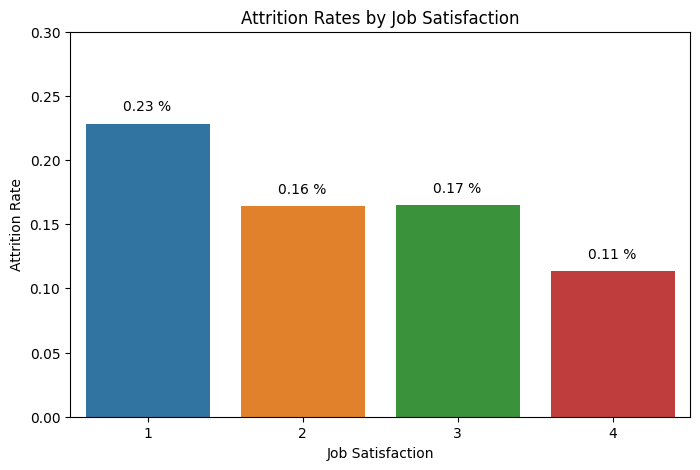

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x=satisfy_att.index, y=satisfy_att['Attrition Rate'])
plt.title('Attrition Rates by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Attrition Rate')
plt.ylim((0, 0.3))
for i, rate in enumerate(satisfy_att['Attrition Rate']):
    plt.text(i, rate+0.01, f'{rate:.2f} %', ha='center')
plt.show()

The above graph shows some significance of Job Satisfaction. Therefore, next we need to use statistical tests to prove it.

#### Correlation Test

In [13]:
correlation = df["JobSatisfaction"].corr(df["Attrition"])
print("Correlation (Job Satisfaction & Attrition Rate): ", correlation)

Correlation (Job Satisfaction & Attrition Rate):  -0.10348112606902155


Since correaltion test is used to determine whether there's any linear realtionship between two variables. The -0.10 value indicates that there's no significant linear relationship between Job Satisfaction and Attrition Rate. Next, let's try T-test.

#### T-test

In [14]:
# T-test only works for binary categorical variable
satisfied = df[df["JobSatisfaction"] >= 3]
not_satisfied = df[df["JobSatisfaction"] < 3]

t_statistic, p_value = ttest_ind(satisfied["Attrition"], not_satisfied["Attrition"])

print("T-test statistics: ", t_statistic)
print("p-value: ", p_value)

T-test statistics:  -2.957368420952157
p-value:  0.0031523745372399555


Now, we can see that the p-value (0.003) is small enough to say that there's a relationship between Job Satisfaction and Attrition Rates. Our hypothesis is true.

## 4. Feature Engineering

In [15]:
df['Environment_Satisfied'] = np.where(df["EnvironmentSatisfaction"] >= 3, 1, 0)
df['Job_Satisfied'] = np.where(df["JobSatisfaction"] >= 3, 1, 0)
df['JobInv_Satisfied'] = np.where(df["JobInvolvement"] >= 3, 1, 0)
df['Relationship_Satisfied'] = np.where(df["RelationshipSatisfaction"] >= 3, 1, 0)
df['WLB_Satisfied'] = np.where(df["WorkLifeBalance"] >= 3, 1, 0)
df['Performance_Rating'] = np.where(df["PerformanceRating"] >= 3, "Above Expectation", "Needs Improvement")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,Year,Quarter,Month,Day,Environment_Satisfied,Job_Satisfied,JobInv_Satisfied,Relationship_Satisfied,WLB_Satisfied,Performance_Rating
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,2023,Q3,7,6,0,1,1,0,0,Above Expectation
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,2023,Q1,3,3,1,0,0,1,1,Above Expectation
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2023,Q1,1,28,1,1,0,0,1,Above Expectation
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,2023,Q1,1,17,1,1,1,1,1,Above Expectation
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,2023,Q1,3,15,0,0,1,1,1,Above Expectation


In [17]:
cat_features = df.select_dtypes('object').copy()
num_features = df.select_dtypes(['float64', 'int64']).copy()
num_features.drop(['Attrition', 'EnployeeCount', 'EmployeeNumber', 'Year', 'Month', 'Day', 'Environment_Satisfied', 'Job_Satisfied', 'JobInv_Satisfied', 'Relationship_Satisfied', 'WLB_Satisfied'], axis=1, inplace=True)
cat_features = pd.concat([cat_features, df[['Year', 'Month', 'Day', 'Environment_Satisfied', 'Job_Satisfied', 'JobInv_Satisfied', 'Relationship_Satisfied', 'WLB_Satisfied']]], axis=1)
target = df['Attrition']

cat_features.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Quarter,Performance_Rating,Year,Month,Day,Environment_Satisfied,Job_Satisfied,JobInv_Satisfied,Relationship_Satisfied,WLB_Satisfied
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,Q3,Above Expectation,2023,7,6,0,1,1,0,0
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,Q1,Above Expectation,2023,3,3,1,0,0,1,1
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,Q1,Above Expectation,2023,1,28,1,1,0,0,1
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,Q1,Above Expectation,2023,1,17,1,1,1,1,1
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,Q1,Above Expectation,2023,3,15,0,0,1,1,1


In [18]:
num_features.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,3,61,2,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,92,2,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,4,56,3,1,3,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,1,40,3,1,2,...,4,80,1,6,3,3,2,2,2,2


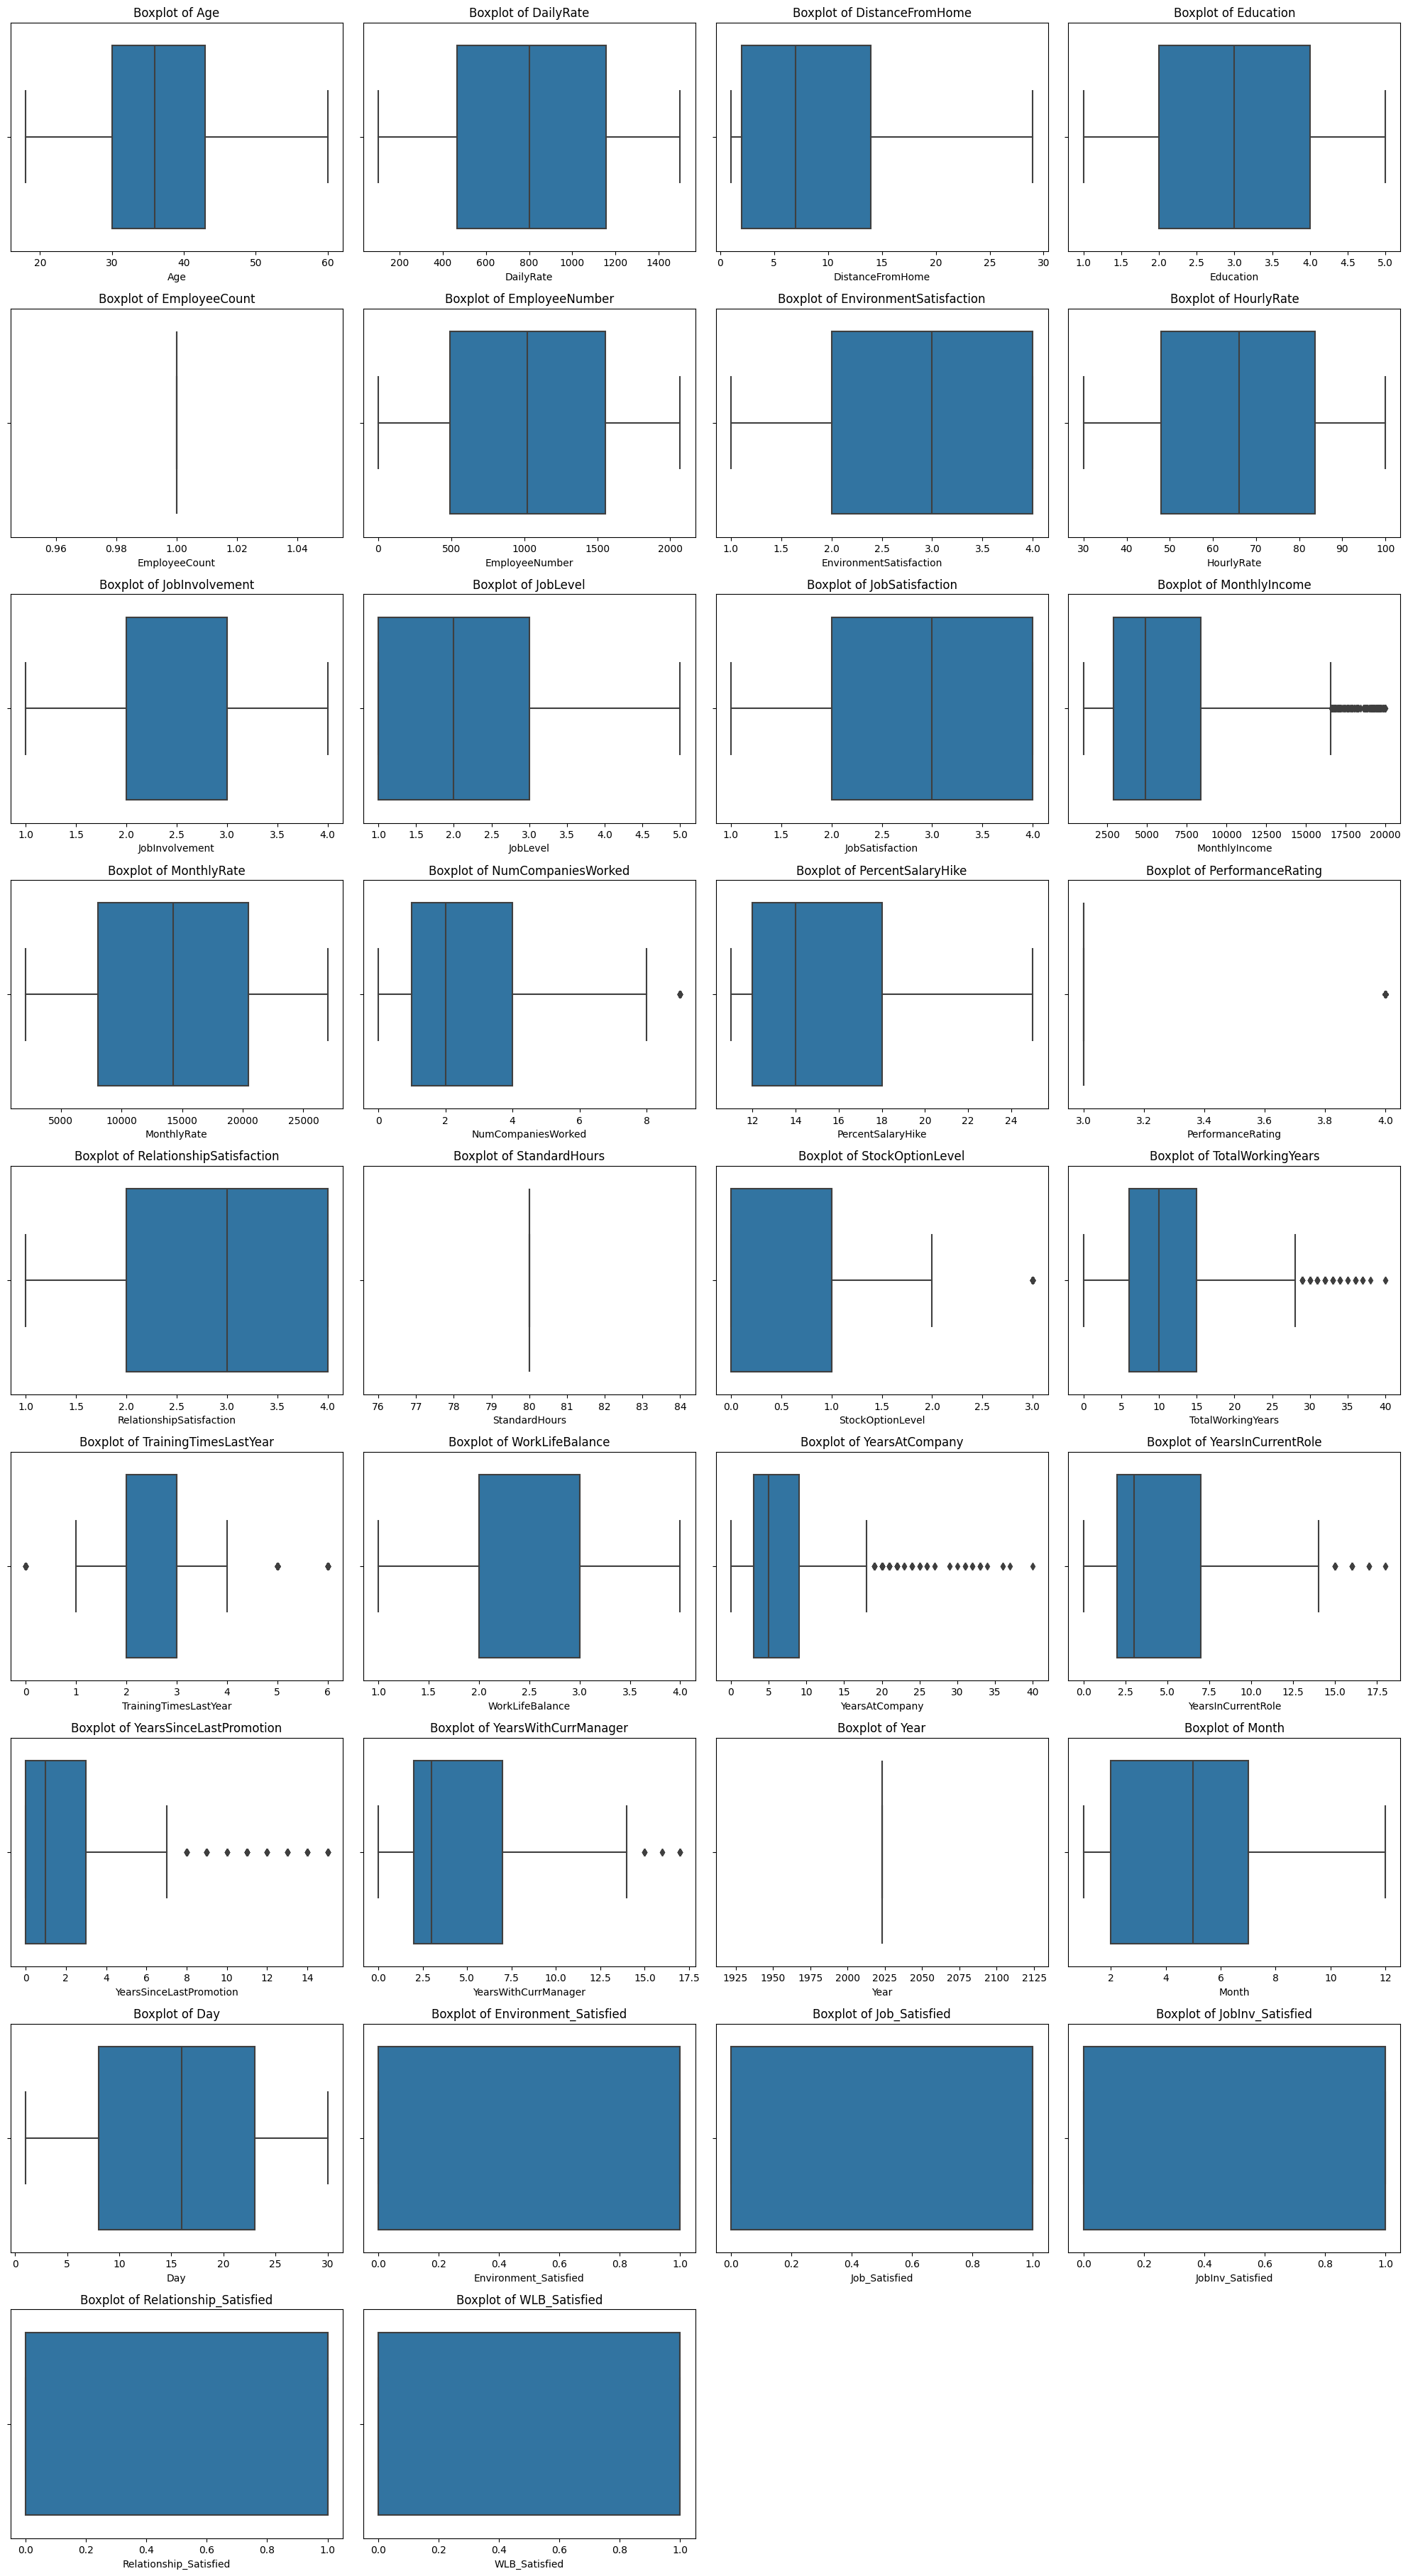

In [ ]:
def plot_numeric_variable_boxplots(dataframe):
    numerical_vars = dataframe.select_dtypes(include=['float64', 'int64']).columns
    num_vars = len(numerical_vars)
    rows = (num_vars // 4) + (num_vars % 4)
    
    fig, axs = plt.subplots(rows, 4, figsize=(20, 4*rows))
    axs = axs.flatten()
    
    for i, var in enumerate(numerical_vars):
        sns.boxplot(data=dataframe, x=var, ax=axs[i])
        axs[i].set_title(f"Boxplot of {var}")
    
    for i in range(num_vars, 4*rows):
        fig.delaxes(axs[i])
    
    plt.tight_layout()
    plt.show()

plot_numeric_variable_boxplots(num_features)